In [1]:
from cmdstanpy import CmdStanModel


import arviz as az
import numpy as np
import scipy.stats as stats

import matplotlib.pyplot as plt
import pandas as pd

/usr/local/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


**Exercise 1**

In [2]:
F = 'Filip'
L = 'Wójtowicz'
N = (len(F) + len(L))*100
N

1400

In [3]:
model_1=CmdStanModel(stan_file='code_1.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [4]:
R = 1
sim_1=model_1.sample(data={'N': N}, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [5]:
df_sim_1 = sim_1.draws_pd()
df_sim_1.head()

,lp__,accept_stat__,theta,y[1],y[2],y[3],y[4],y[5],y[6],y[7],...,y[1391],y[1392],y[1393],y[1394],y[1395],y[1396],y[1397],y[1398],y[1399],y[1400]
0,0.0,0.0,0.01,-0.424502,-0.063661,-0.833885,1.55158,-0.362245,0.743487,0.970844,...,-0.172749,1.53637,0.74268,-0.073685,2.03962,-0.166802,-0.200499,-0.304691,-0.304062,0.812941


In [6]:
model_2=CmdStanModel(stan_file='code_2.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [7]:
R = 1
sim_2=model_2.sample(data={'N': N}, 
                     iter_sampling=R, 
                     iter_warmup=0, 
                     chains=1, 
                     refresh=R,
                     fixed_param=True,
                     seed=29042020)

INFO:cmdstanpy:CmdStan start processing
chain 1 |██████████| 00:00 Sampling completed


INFO:cmdstanpy:CmdStan done processing.


In [8]:
df_sim_2 = sim_2.draws_pd()
df_sim_2.head()

,lp__,accept_stat__,"X[1,1]","X[2,1]","X[3,1]","X[4,1]","X[5,1]","X[6,1]","X[7,1]","X[8,1]",...,y[1391],y[1392],y[1393],y[1394],y[1395],y[1396],y[1397],y[1398],y[1399],y[1400]
0,0.0,0.0,2.70817,0.777181,-1.27227,0.127591,-1.38942,0.246162,1.19873,2.26533,...,-0.580623,-3.87758,0.432652,-0.723898,2.00589,1.74348,-1.54076,-0.564548,0.183165,3.44084


**Exercise 2**

In [9]:
model_3=CmdStanModel(stan_file='code_3.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [10]:
data_model_1 = df_sim_1.iloc[0, 3:]

sim_3=model_3.sample(data={'N': N, 'y': data_model_1})

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:05 Iteration: 1900 / 2000 [ 95%]  (Sampling)


















chain 1 |██████████| 00:11 Sampling completed                       
chain 2 |██████████| 00:11 Sampling completed                       
chain 3 |██████████| 00:11 Sampling completed                       
chain 4 |██████████| 00:11 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [11]:
df_sim_3 = sim_3.draws_pd()
df_sim_3.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,mu,log_lik[1],...,y_hat[1391],y_hat[1392],y_hat[1393],y_hat[1394],y_hat[1395],y_hat[1396],y_hat[1397],y_hat[1398],y_hat[1399],y_hat[1400]
0,-2614.60,0.763212,0.914977,2.0,3.0,0.0,2615.04,1.61009,0.111857,-1.45071,...,0.745454,0.692032,3.188510,0.722660,2.259060,-1.195910,0.526148,0.669358,2.45012,-0.315838
1,-2615.96,0.907575,0.914977,2.0,3.0,0.0,2616.17,1.63441,0.092780,-1.46031,...,1.703080,0.657236,1.920860,-0.997964,-2.560060,-1.988430,4.126540,1.567390,2.63973,-0.004910
2,-2614.24,1.000000,0.914977,2.0,3.0,0.0,2616.14,1.54521,0.039919,-1.39927,...,-0.259742,-0.764661,-0.331562,0.316004,0.657168,-3.318660,-1.962420,-0.276333,3.20671,0.653683
3,-2614.20,0.862361,0.914977,2.0,3.0,0.0,2615.64,1.52711,0.109027,-1.40335,...,-0.661386,-2.647740,-3.268640,3.421010,-0.380060,1.604300,-0.069435,-0.375848,2.54709,0.601914
4,-2614.59,0.785814,0.914977,2.0,3.0,0.0,2616.04,1.58139,0.153415,-1.44402,...,1.926130,0.575161,-0.232539,0.566221,-1.268250,0.430246,0.461108,-0.336005,-2.31455,-0.246736


In [12]:
model_4=CmdStanModel(stan_file='code_4.stan')

INFO:cmdstanpy:found newer exe file, not recompiling


In [13]:
data_model_1 = df_sim_1.iloc[0, 3:]

sim_4=model_4.sample(data={'N': N, 'y': data_model_1})

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:09 Iteration: 1900 / 2000 [ 95%]  (Sampling)












































chain 1 |██████████| 00:22 Sampling completed                       
chain 2 |██████████| 00:22 Sampling completed                       
chain 3 |██████████| 00:22 Sampling completed                       
chain 4 |██████████| 00:22 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [14]:
df_sim_4 = sim_4.draws_pd()
df_sim_4.head()

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,sigma,mu,nu,...,y_hat[1391],y_hat[1392],y_hat[1393],y_hat[1394],y_hat[1395],y_hat[1396],y_hat[1397],y_hat[1398],y_hat[1399],y_hat[1400]
0,-2106.46,0.986227,0.683164,3.0,7.0,0.0,2107.90,0.832502,0.006792,4.33883,...,-0.152200,0.616351,1.709530,1.14582,0.503415,-0.852853,0.272786,-1.599940,-0.016611,-1.060750
1,-2106.30,0.950449,0.683164,2.0,7.0,0.0,2107.93,0.802080,-0.000237,3.56451,...,-1.238920,-1.590360,-2.536780,0.29482,1.688780,-1.471860,-0.408853,-1.565930,-1.031790,-1.234650
2,-2107.96,0.720169,0.683164,2.0,3.0,0.0,2108.56,0.791055,-0.019977,3.86923,...,-0.349117,-0.896976,0.420830,-2.46029,-0.046583,-0.383101,0.566293,-0.233664,0.739048,-1.516010
3,-2107.60,1.000000,0.683164,3.0,7.0,0.0,2108.71,0.819186,0.039123,3.35072,...,-0.325997,3.378320,0.542847,-1.01205,0.462070,0.262540,0.093053,0.348396,0.385822,1.687300
4,-2106.62,1.000000,0.683164,2.0,3.0,0.0,2107.61,0.803968,0.037556,3.53943,...,-1.274400,0.901788,-0.730511,-1.08967,0.441838,2.081360,-0.320897,-0.658989,0.112286,-0.683667


In [15]:
data = {'model_3': sim_3, 'model_4': sim_4}
compare_loo = az.compare(data, ic='loo')
compare_loo

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:811: UserWarning: Estimated shape parameter of Pareto distribution is greater than 0.7 for one or more samples. You should consider using a more robust model, this is because importance sampling is less likely to work well if the marginal posterior and LOO posterior are very different. This is more likely to happen with a non-robust model and highly influential observations.
  warnings.warn(


,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
model_4,0,-2107.179946,4.383426,0.000000,1.000000e+00,42.124478,0.000000,False,log
model_3,1,-2629.015507,28.860238,521.835561,3.924839e-09,145.528858,116.447609,True,log


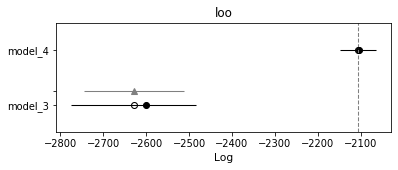

In [16]:
az.plot_compare(compare_loo)
plt.title("loo")
plt.show()

In [17]:
data = {'model_3': sim_3, 'model_4': sim_4}
compare_waic = az.compare(data, ic='waic')
compare_waic

/usr/local/lib/python3.9/site-packages/arviz/stats/stats.py:1635: UserWarning: For one or more samples the posterior variance of the log predictive densities exceeds 0.4. This could be indication of WAIC starting to fail. 
See http://arxiv.org/abs/1507.04544 for details
  warnings.warn(


,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
model_4,0,-2107.159020,4.362501,0.000000,1.000000e+00,42.119318,0.000000,False,log
model_3,1,-2629.139181,28.983911,521.980161,4.179469e-09,145.579844,116.507137,True,log


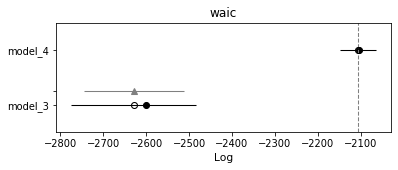

In [18]:
az.plot_compare(compare_waic)
plt.title("waic")
plt.show()

**Exercise 3**

In [19]:
model_5=CmdStanModel(stan_file='code_5.stan')

INFO:cmdstanpy:compiling stan file /home/Volume_for_docker/Lab6/code_5.stan to exe file /home/Volume_for_docker/Lab6/code_5
INFO:cmdstanpy:compiled model executable: /home/Volume_for_docker/Lab6/code_5


In [26]:
data_for_model_5_1 = {'N': N, 'K': 1, 'y': df_sim_2.loc[:, 'y[1]':].values.reshape((N)), 'X': df_sim_2.loc[:, 'X[1,1]': f'X[{N},1]'].values.reshape((N, 1))}

sim_5_1=model_5.sample(data=data_for_model_5_1)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:03 Iteration: 1900 / 2000 [ 95%]  (Sampling)
























chain 1 |██████████| 00:07 Sampling completed                       
chain 2 |██████████| 00:07 Sampling completed                       
chain 3 |██████████| 00:07 Sampling completed                       
chain 4 |██████████| 00:07 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [27]:
data_for_model_5_2 = {'N': N, 'K': 2, 'y': df_sim_2.loc[:, 'y[1]':].values.reshape((N)), 'X': df_sim_2.loc[:, 'X[1,1]': f'X[{N},2]'].values.reshape((N, 2))}

sim_5_2=model_5.sample(data=data_for_model_5_2)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:04 Iteration: 1900 / 2000 [ 95%]  (Sampling)









































chain 1 |██████████| 00:08 Sampling completed                       
chain 2 |██████████| 00:08 Sampling completed                       
chain 3 |██████████| 00:08 Sampling completed                       
chain 4 |██████████| 00:08 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [28]:
data_for_model_5_3 = {'N': N, 'K': 3, 'y': df_sim_2.loc[:, 'y[1]':].values.reshape((N)), 'X': df_sim_2.loc[:, 'X[1,1]': f'X[{N},3]'].values.reshape((N, 3))}

sim_5_3=model_5.sample(data=data_for_model_5_3)

INFO:cmdstanpy:CmdStan start processing
chain 1 |          | 00:00 Status


chain 1 |██████████| 00:04 Iteration: 1900 / 2000 [ 95%]  (Sampling)
































chain 1 |██████████| 00:08 Sampling completed                       
chain 2 |██████████| 00:08 Sampling completed                       
chain 3 |██████████| 00:08 Sampling completed                       
chain 4 |██████████| 00:08 Sampling completed                       


INFO:cmdstanpy:CmdStan done processing.


In [31]:
data = {'model_5_1': sim_5_1, 'model_5_2': sim_5_2, 'model_5_3': sim_5_3}
compare_loo = az.compare(data, ic='loo')
compare_loo

,rank,loo,p_loo,d_loo,weight,se,dse,warning,loo_scale
model_5_1,0,-2543.685240,2.098006,0.000000,1.0,27.100770,0.000000,False,log
model_5_3,1,-3289.061164,3.764127,745.375924,0.0,25.395335,30.212686,False,log
model_5_2,2,-3289.267034,3.107236,745.581793,0.0,25.445942,30.263049,False,log


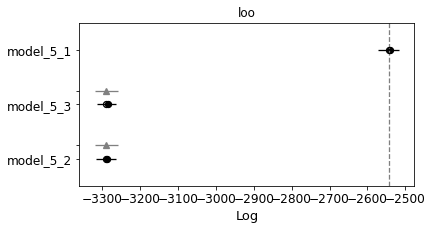

In [32]:
az.plot_compare(compare_loo)
plt.title("loo")
plt.show()

In [33]:
data = {'model_5_1': sim_5_1, 'model_5_2': sim_5_2, 'model_5_3': sim_5_3}
compare_waic = az.compare(data, ic='waic')
compare_waic

,rank,waic,p_waic,d_waic,weight,se,dse,warning,waic_scale
model_5_1,0,-2543.685221,2.097987,0.000000,1.000000e+00,27.100767,0.000000,False,log
model_5_3,1,-3289.060948,3.763911,745.375727,0.000000e+00,25.395305,30.212669,False,log
model_5_2,2,-3289.267060,3.107262,745.581839,1.121325e-14,25.445949,30.263053,False,log


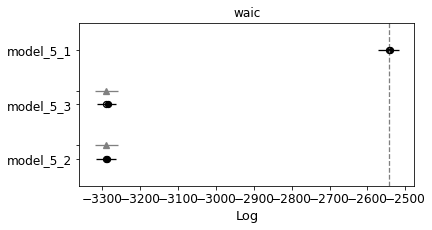

In [34]:
az.plot_compare(compare_waic)
plt.title("waic")
plt.show()